In [50]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from tqdm import tqdm
import copy
from collections import OrderedDict 
import scipy.stats as stats

In [20]:
#temp = np.load('features_conv5_all.pth.npy', allow_pickle=True)
#features = temp.item()
features = torch.load('features_conv5.pth')
features_arr = np.stack([f for f in features.values()])


In [21]:
#categories = sorted(set(i.split('/')[0] for i in features.keys()))
#classes = {c: n for n, c in enumerate(categories)}
#images = [img for img in features.keys()]
#classes = {img: classes[img.split('/')[0]] for img in features.keys()}

rdms = {n: np.zeros((len(features), len(features))) for n in np.arange(0, 256, 1)}

In [35]:
# Load visual -> semantic feature ranking
acc = np.load('./UnitRemoval/r_vis2sem.npy')

features_reshape = copy.deepcopy(features)
for item in features_reshape:
    features_reshape[item] = np.reshape(features_reshape[item], (256, 7, 7))
    

In [43]:
for n in tqdm(range(0, 256, 1)):
    if n == 0:
        continue
    features_temp = copy.deepcopy(features_reshape)
    maxidx = np.argsort(np.array(acc))[:n]
    for idx in maxidx:
        for item in features_temp:
            features_temp[item][idx][:][:] = 0
    features_arr = np.stack([np.reshape(feature, (12544,)) for feature in features_temp.values()])
    for i, c in enumerate(features_arr):
        for j, d in enumerate(features_arr): 
            r, p = stats.pearsonr(c, d) # computing pairwise correlations of betas
            rdms[n][i, j] = r
        if i % 100 == 0:
            print(i, r)

  0%|          | 0/256 [00:00<?, ?it/s]

0 0.011822456324520444
100 0.08493122747573659


  0%|          | 1/256 [00:40<2:52:31, 40.60s/it]


KeyboardInterrupt: 

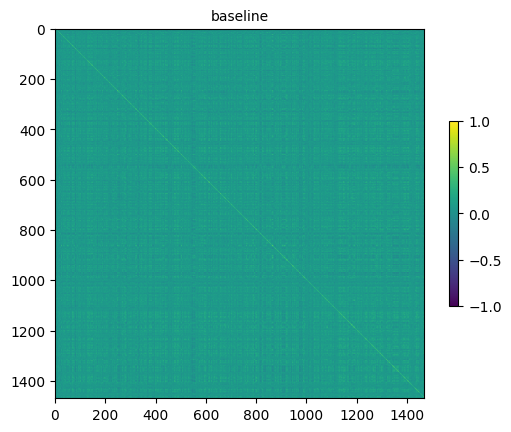

In [45]:
#sns.set()
#plt.figure(figsize=(15,15))
title_font = {'size':'10'}
plt.title('baseline', **title_font)
#plt.xticks(np.arange(nConds), conds, rotation=90)
#plt.yticks(np.arange(nConds), conds)
plt.imshow(rdms[0])
plt.colorbar(shrink=0.5)
plt.clim(-1, 1) 
#plt.savefig('figures/rdm' + str(n) + '_' + roi + '.png') # save rdm figures
plt.show()
sns.reset_defaults()

In [17]:
print(rdms[0].shape)
print(len(rdms))

(26107, 26107)
256


In [48]:
# rsa 2-a. target rdm: semantic 
#rdms_2a = np.load("rsa_2a")
# Load semantic embeddings

with open('ThingsWrd2Sns.txt', 'r', encoding='utf-8') as txt:
    temp = txt.readlines()
nDim = 2250
wordlist = [line.split(',')[0] for idx, line in enumerate(temp) if idx != 0] # create word list
word2sense = {new_list: np.zeros((1, nDim)) for new_list in wordlist} # create (word: embedding) dictionary
for i, line in enumerate(temp):
    if i == 0:
        continue
    embedding = line.split(',')
    embedding.remove('\n')
    embedding_float = ([float(j) for j in embedding[1:]])
    word2sense[embedding[0]] = np.array(embedding_float)
word2sense = OrderedDict(word2sense)

embeddings = np.stack([e for e in word2sense.values()])

# baseline rdm for word2sense
rdm = np.zeros((len(word2sense), len(word2sense)))

for i, c in enumerate(embeddings):
    for j, d in enumerate(embeddings): 
        r, p = stats.pearsonr(c, d) # computing pairwise correlations of betas
        rdm[i, j] = r
    if i % 100 == 0:
        print(i, r)
        
#sns.set()
#plt.figure(figsize=(15,15))
title_font = {'size':'10'}
plt.title('baseline', **title_font)
#plt.xticks(np.arange(nConds), conds, rotation=90)
#plt.yticks(np.arange(nConds), conds)
plt.imshow(rdm)
plt.colorbar(shrink=0.5)
plt.clim(-1, 1) 
#plt.savefig('figures/rdm' + str(n) + '_' + roi + '.png') # save rdm figures
plt.show()
sns.reset_defaults()

In [62]:
# Wordvec filtered by CM
wordvec = {}
with open('ThingsWrd2Vec_subset.txt', 'r', encoding='utf-8') as txt:
    temp = txt.readlines()

for i, wv in enumerate(temp):
    if i == 0:
        continue
    w = (temp[i].split(','))[0]
    if w in word2sense:
        wordvec[w] = temp[i].split(',')[1:]
        wordvec[w][-1] = wordvec[w][-1].replace('\n', '')

for wv in wordvec:
    wordvec[wv] = np.array(wordvec[wv]).astype(np.float)

embeddings = np.stack([e for e in wordvec.values()])

# baseline rdm for word2vec
rdm_ = np.zeros((len(wordvec), len(wordvec)))

for i, c in enumerate(embeddings):
    for j, d in enumerate(embeddings): 
        r, p = stats.pearsonr(c, d) # computing pairwise correlations of betas
        rdm_[i, j] = r
    if i % 100 == 0:
        print(i, r)

0 0.08447797375638379
100 0.06741385362598161
200 0.2305823280620219
300 -0.007557680511448936


In [55]:
nConds = 1470
triu_ind = np.triu_indices(nConds, k=1) # indices for upper triangles
for m in rdms:
    r, p = stats.spearmanr(rdm[triu_ind], rdms[m][triu_ind], axis=None) # compute rank correlation between each model and each roi rdm

0.22078669480995525
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
